# Package Tutorial

This Jupyter Notebook explains each magnetic activity index calculation method and shows how to calculate them for a star using the index functions called from the '__index_calc__' python module and secondary spectrum analysis functions ad plotting functions from the '__spec_analysis__'  & '__plotting__' module. <br>
Before using the functions, make sure you have the following python packages installed on your machine;

- numpy 
- pandas
- matplotlib
- tqdm
- astropy
- PyAstronomy

In addition to these, install the '__specutils__' package from [here](https://specutils.readthedocs.io/en/stable/installation.html)

## Table.

1. [H$\alpha$ Index](#HaI_cell)
2. [CaI Index](#CaI_cell)
3. [NaI Index](#NaI_cell)
4. [CaIIH Index](#CaIIH_cell)
5. [HARPS/HARPS-N Instrument Use](#HARPS_cell)
6. [Read data](#read_data_cell)
7. [LombScargle Periodogram](#LS_cell)
8. [Period Phase Fit](#period_fit_cell)
9. [System Ephemerides](#ephem_cell)
10. [Plotting](#plotting_cell)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from test_package import * # Imports all modules from the 'test_package'

plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.figsize'] = [10,4]

%matplotlib widget

<a id='HaI_cell'></a>

## H$\alpha$ activity index following [Boisse et al. 2009](https://arxiv.org/pdf/0811.3923)

The H$\alpha$ index is calculated simply as; $I_{H\alpha} = \frac{F_{H\alpha}}{(F_{1} + F_{2})}$ where $F_{H\alpha}$ is the mean flux within a band width of 0.16nm centered at 656.2808nm and $F_{1}, F_{2}$ are the mean fluxes within a band width of 1.075nm and 0.875nm centered at 655.087nm and 658.031nm respectively. <br>
The error on the index is estimated by differentiating the respective equation and taking into account the flux in each band giving; $\sigma_{I_{H\alpha}} \approx |I_{H\alpha}|\sqrt{(\frac{\sigma_{F_{H\alpha}}}{F_{H\alpha}})^2 + (\frac{\sigma_{F_{1}+F_{2}}}{F_{1}+F_{2}})^2}$ where $\sigma_{F_{1}+F_{2}} \approx \sqrt{\sigma_{F_{1}}^2 + \sigma_{F_{2}}^2}$ <br>

The '__H_alpha_index__' function is called from the '__index_calc__' python module and an example run of this function is shown below.

- To get the docstring for this function along with its parameters list, type the function in a cell with a '?' next to it or type help(function/module) and run it. <br>
NOTE: This can be done for any function/module.

In [3]:
index_calc.H_alpha_index?

Signature:
index_calc.H_alpha_index(
    file_path,
    radial_velocity=9609,
    degree=4,
    H_alpha_line=656.2808,
    H_alpha_band=0.16,
    CaI_line=657.2795,
    CaI_band=0.08,
    F1_line=655.087,
    F1_band=1.075,
    F2_line=658.031,
    F2_band=0.875,
    Instrument='NARVAL',
    Stokes_profile=['V'],
    norm_spec=False,
    plot_fit=False,
    plot_spec=True,
    print_stat=True,
    save_results=False,
    results_file_name=None,
    save_figs=False,
    out_file_path=None,
    ccf_file_path=None,
    CaI_index=True,
)
Docstring:
Calculates the H alpha index following Boisse I., et al., 2009, A&A, 495, 959. In addition, it also 
calculates the CaI index following Robertson P., Endl M., Cochran W. D., Dodson-Robinson S. E., 2013, ApJ, 764, 3. 

This index uses the exact same reference continuums, F1 and F2, used for the H alpha index to serve as a 
control against the significance of H alpha index variations!

Parameters:

-----------
file_path: list, .s format (NARVAL), 

- Below is an example run of this function on the M dwarf GJ 436 spectrum taken from [Polarbase](http://polarbase.irap.omp.eu).
- Input the .s file path to the `file_path parameter`, .out file path to the `out_file_path parameter` and the instrument name the data is collected from to the `Instrument` parameter. Note, these file paths should be given as a list. The `Stokes_profile` parameter is set to ['V'] by default for the NARVAL Instrument.
- Now simply run the cell to calculate the H alpha index. The run begins by showing a progress bar with the total number of files being analysed, the run time per iteration and the total estimated run time. To show an interactive plot, type the magic command '__%matplotlib notebook__' for Jupyter Notebook and '__%matplotlib widget__' for Jupyter Lab, at the start of a cell. NOTE: If it does not work in Jupyter Lab, read this stackoverflow [issue](https://stackoverflow.com/questions/50149562/jupyterlab-interactive-plot).

Extracting spectral orders
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Total 36 spectral orders extracted
-------------------------------------------------------------------------------------------------------------------------------------------------------------
The #34 order wavelength read from .s file using pandas is: [652.7587 652.7634 652.7679 ... 678.3605 678.364  678.3672]
The #34 order intensity read from .s file using pandas is: [1.2205  1.301   1.3834  ... 0.65701 0.64762 0.64469]
The #34 order intensity error read from .s file using pandas is: [0.020879 0.021319 0.022381 ... 0.014456 0.015194 0.014733]
-------------------------------------------------------------------------------------------------------------------------------------------------------------
The doppler shift size using RV 9609 m/s and the H alpha line of 656.2808nm is: 0.021nm
------------------

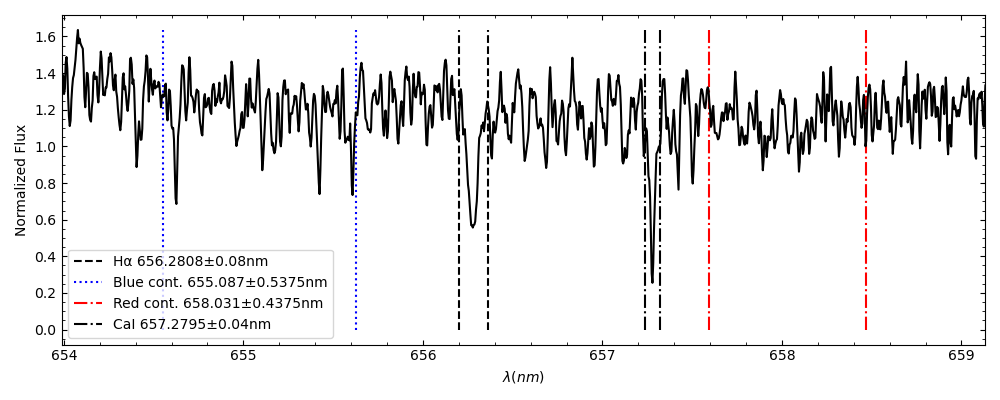

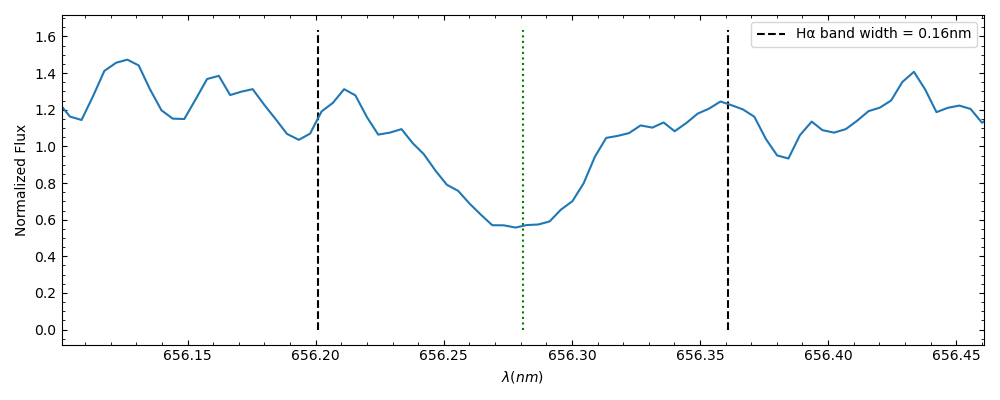

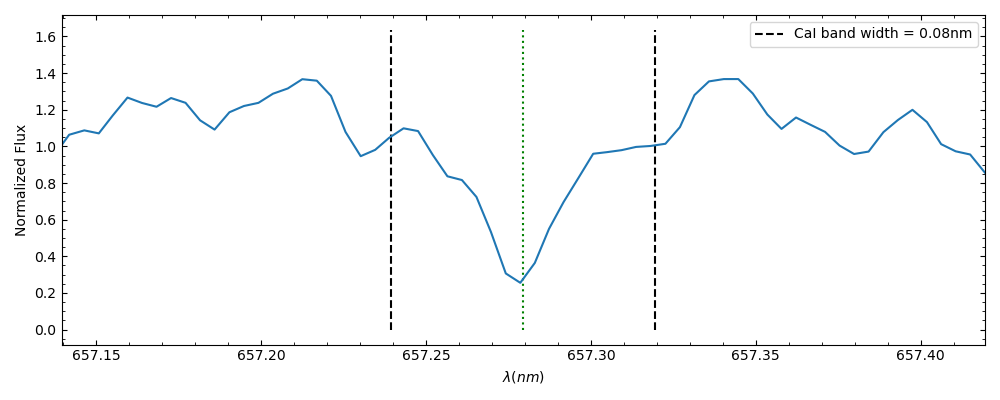

In [4]:
## NARVAL spectra of GJ 436

file_path = 'Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.s'
out_file_path = 'Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.out'

HaI = index_calc.H_alpha_index(file_path=[file_path],
                               out_file_path=[out_file_path])


<a id='CaI_cell'></a>

## CaI index within H$\alpha$ index function following [Robertson et al. 2013](https://ui.adsabs.harvard.edu/abs/2013ApJ...764....3R/abstract)

The CaI index is calculated the same way as the H$\alpha$ index as; $I_{CaI} = \frac{F_{CaI}}{(F_{1} + F_{2})}$ where $F_{CaI}$ is the mean flux within a band width of 0.08 nm centered at 657.2795 nm with $F_{1}$ and $F_{2}$ being the same continuum fluxes used for the H$\alpha$ index. This index is known to not vary with stellar magnetic activity and because of this, the CaI index is calculated as a check for the H$\alpha$ activity significance since any variation in H$\alpha$ activity should not be seen in the CaI indices. <br>
The error on the index is estimated by differentiating the respective equation and taking into account the flux in each band giving; $\sigma_{I_{CaI}} \approx |I_{CaI}|\sqrt{(\frac{\sigma_{F_{CaI}}}{F_{CaI}})^2 + (\frac{\sigma_{F_{1}+F_{2}}}{F_{1}+F_{2}})^2}$ where $\sigma_{F_{1}+F_{2}} \approx \sqrt{\sigma_{F_{1}}^2 + \sigma_{F_{2}}^2}$ <br>

<a id='second_func_cell'></a>

### NOTE: 

- The spectrum data downloaded from Polarbase consists of a number of individual spectral orders all of which together form the entire spectrum profile. Therefore, to calculate an activity index, one needs to know which of these spectral orders contains the required chromospheric lines and its respective reference continuum lines. <br>
- Mostly the spectrum data of any star downloaded from PolarBase will have the chromospheric lines appearing within the same spectral order whose numbers are fixed for each activity index function but if that's not the case, the `read_data` and `check_lines` functions within the __spec_analysis__ module can be used to check which spectral order for a star contains the required chromopsheric lines, as shown below;

Reading the data from the .s file: Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.s
----------------------------------------------------------------------------------------------------------------
Stokes Profile: [V]
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
Extracting all overlapping spectral orders
----------------------------------------------------------------------------------------------------------------
Extracting useful object parameters from the .out file: Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.out
----------------------------------------------------------------------------------------------------------------
NUM_EXP: 4.0
GAIN: 1.33
RON: 4.14
RA: 11:43:0.90
Dec: 26:36:45.9
AIRMASS: 1.142
T_EXP: 2800.0
HJD: 2457542.37484
V_mag: 11.37
T_eff: 2677.0


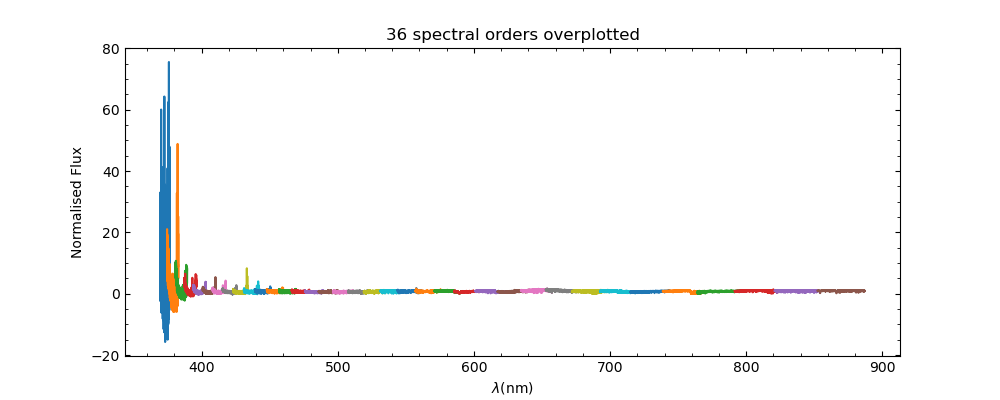

In [7]:
# The 'read_data' function extracts all spectral orders and plots them from the .s_file along with some 
# useful object parameters from the .out file

obj_params, spec_orders = spec_analysis.read_data(file_path=file_path,
                                                  out_file_path=out_file_path,
                                                  Instrument='NARVAL')

- Now to run the `check_lines` function, we need to create three lists each containing the name of the lines, their wavelengths and their respective bandwidths as shown below:

In [8]:

H_alpha_line=656.2808
H_alpha_band=0.16
CaI_line=657.2795
CaI_band=0.08
F1_line=655.087
F1_band=1.075
F2_line=658.031
F2_band=0.875

all_lines_names = ['Hα', 'CaI', 'F1', 'F2']
all_lines = [H_alpha_line, CaI_line, F1_line, F2_line]
all_bandwidths = [H_alpha_band, CaI_band, F1_band, F2_band]

line_idx = spec_analysis.check_lines(spectral_orders=spec_orders,
                                     line_names=all_lines_names,
                                     lines=all_lines,
                                     bandwidths=all_bandwidths)

The Hα line is found within 2 spectral order(s)
Order: #35
Order: #34
----------------------------------------------------------------------------------------------------------------
The CaI line is found within 2 spectral order(s)
Order: #35
Order: #34
----------------------------------------------------------------------------------------------------------------
The F1 line is found within 2 spectral order(s)
Order: #35
Order: #34
----------------------------------------------------------------------------------------------------------------
The F2 line is found within 2 spectral order(s)
Order: #35
Order: #34
----------------------------------------------------------------------------------------------------------------


- The `check_lines` function checks which spectral order contains the given lines, prints out the results and returns the index of each spectral order for each line. Here, orders #35 and #34 both contain the required lines for H$\alpha$ index calculation but we only use #34 due to its higher SNR.
- To calculate the index on normalized spectrum, set the `norm_spec` parameter to True as shown below. The spectral order is normalized by fitting a high order polynomial to the continuum and dividing the spectra by the resulting fit. The polynomial degree can be assigned using the `degree` parameter which is set to `4` by default. The `plot_fit` parameter is also set to True to show the fitting procedure. 

Extracting spectral orders
----------------------------------------------------------------------------------------------------------------
Total 37 spectral orders extracted
----------------------------------------------------------------------------------------------------------------
The #34 order wavelength read from .s file using pandas is: [652.7587 652.7634 652.7679 ... 678.3605 678.364  678.3672]
The #34 order intensity read from .s file using pandas is: [1.2205  1.301   1.3834  ... 0.65701 0.64762 0.64469]
The #34 order intensity error read from .s file using pandas is: [0.020879 0.021319 0.022381 ... 0.014456 0.015194 0.014733]
----------------------------------------------------------------------------------------------------------------
The doppler shift size using RV 9609 m/s and the H alpha line of 656.2808nm is: 0.021nm
----------------------------------------------------------------------------------------------------------------
The spectral order used ranges from 652.

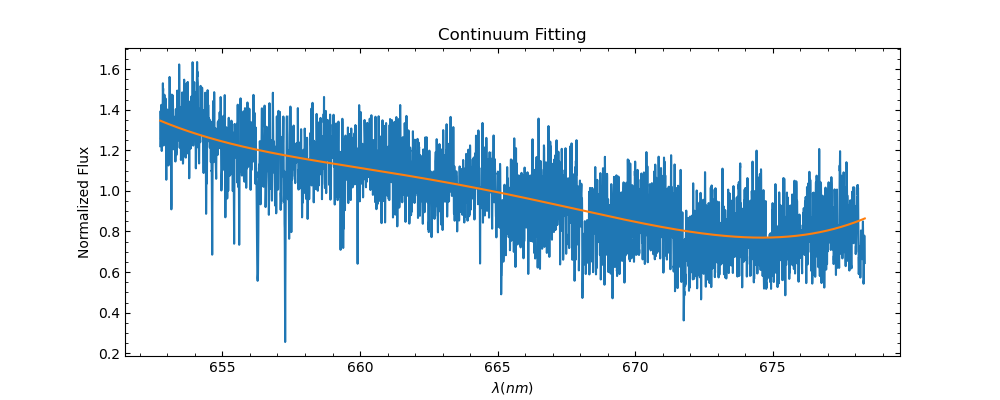

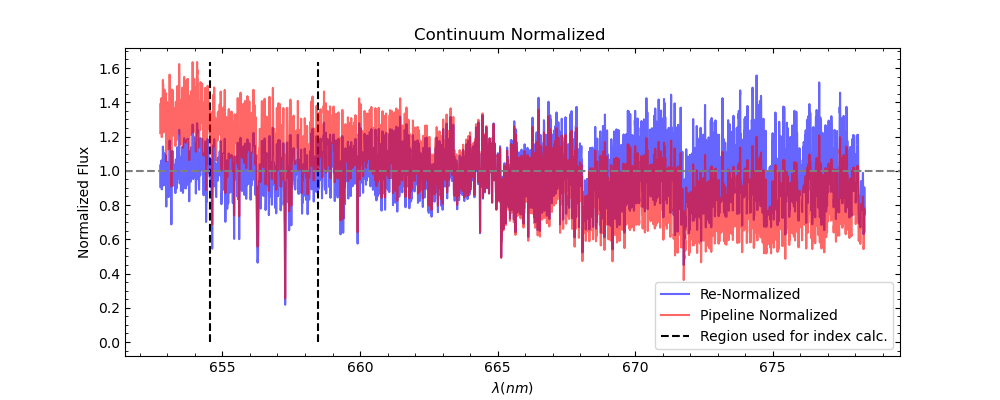

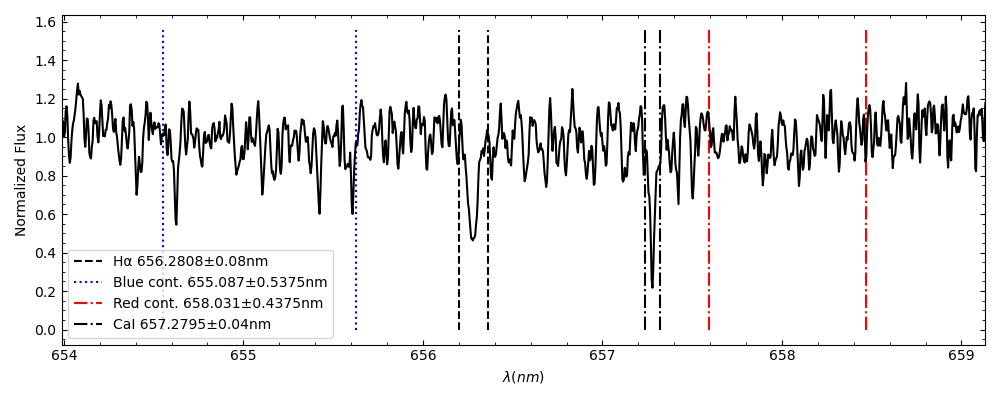

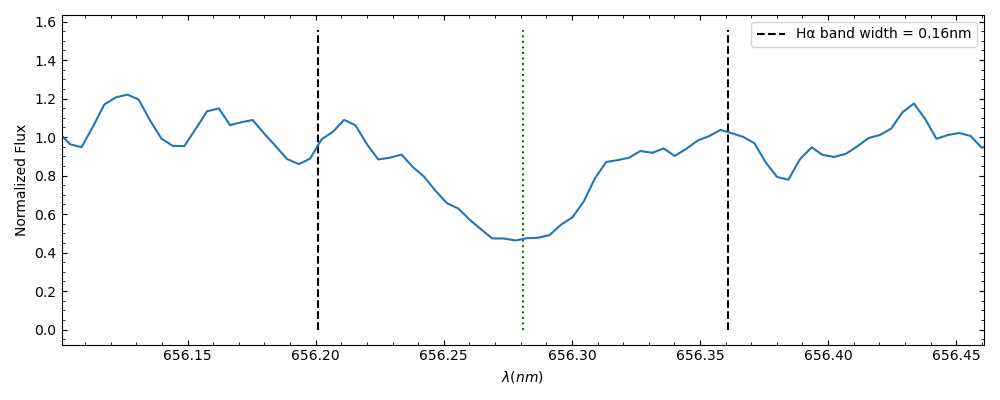

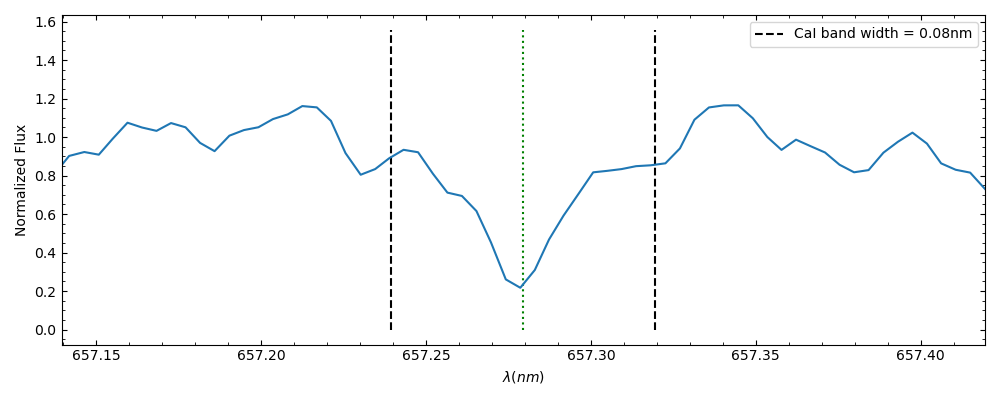

In [9]:

HaI_norm = index_calc.H_alpha_index(file_path=[file_path],
                                    out_file_path=[out_file_path],
                                    norm_spec=True,
                                    plot_fit=True)


- To run this function on multiple files, input a list containing the file paths of each spectrum as shown below. Note the params `plot_spec` and `print_stat` are set to False to not show multiple plots and status updates.

In [10]:
## 5 different NARVAL spectra 

s_files = ['Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.s',
 'Test_files/NARVAL/02may16_norm_gj436_v_01/02may16_norm_gj436_v_01.s',
 'Test_files/NARVAL/03may16_norm_gj436_v_01/03may16_norm_gj436_v_01.s',
 'Test_files/NARVAL/04jun16_norm_gj436_v_01/04jun16_norm_gj436_v_01.s',
 'Test_files/NARVAL/04may16_norm_gj436_v_01/04may16_norm_gj436_v_01.s']

out_files = ['Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.out',
 'Test_files/NARVAL/02may16_norm_gj436_v_01/02may16_norm_gj436_v_01.out',
 'Test_files/NARVAL/03may16_norm_gj436_v_01/03may16_norm_gj436_v_01.out',
 'Test_files/NARVAL/04jun16_norm_gj436_v_01/04jun16_norm_gj436_v_01.out',
 'Test_files/NARVAL/04may16_norm_gj436_v_01/04may16_norm_gj436_v_01.out']


HaI_multi = index_calc.H_alpha_index(file_path=s_files,
                                     out_file_path=out_files,
                                     plot_spec=False,
                                     print_stat=False)

- The run results and its plots can be saved by setting the `save_results` and `save_figs` parameters to True.
- The results will be saved in a .csv file format with the given `results_file_name` and the figures will be saved in a pdf format starting with the Julian Date of the spectrum. 
- Both of these will be saved in the current working directory.

<a id='NaI_cell'></a>

## NaI doublet Index following [Rodrigo F. Díaz et al. 2007](https://arxiv.org/pdf/0704.0812.pdf)
The index is defined as $I_{NaI} = \frac{f_{1} + f_{2}}{f_{cont}}$ where $f_{1}$ & $f_{2}$ are the mean fluxes within a 0.1nm bandwidth centered on the D1 589.592nm and D2 588.995nm line cores. $f_{cont}$ is defined as the pseudo-continuum calculated as $f_{cont} = \frac{F_{1} + F_{2}}{2}$ where $F_{1}$ & $F_{2}$ are mean fluxes of the 10 highest flux values within two reference bands of width 1nm and 2nm centered on 580.5nm and 609.0nm respectively. <br>  
The error on the index is estimated by differentiating the respective equation above and taking into account the flux in each band giving; $\sigma_{I_{NaI}} \approx |I_{NaI}|\sqrt{(\frac{\sigma_{f_{1}+f_{2}}}{f_{1}+f_{2}})^2 + (\frac{\sigma_{f_{cont}}}{f_{cont}})^2}$ where $\sigma_{f_{1}+f_{2}} \approx \sqrt{\sigma_{f_{1}}^2 + \sigma_{f_{2}}^2}$

In [13]:
index_calc.NaI_index_Rodrigo?

Signature:
index_calc.NaI_index_Rodrigo(
    file_path,
    radial_velocity=9609,
    degree=4,
    NaID2=588.995,
    NaID1=589.592,
    NaI_band=0.1,
    F1_line=580.5,
    F1_band=1.0,
    F2_line=609.0,
    F2_band=2.0,
    hfv=10,
    Instrument='NARVAL',
    Stokes_profile=['V'],
    norm_spec=False,
    plot_fit=False,
    plot_spec=True,
    print_stat=True,
    save_results=False,
    results_file_name=None,
    save_figs=False,
    out_file_path=None,
    ccf_file_path=None,
)
Docstring:
This function calculates the NaI doublet index following the method proposed in Rodrigo F. Díaz et al. 2007.

Parameters:
-----------

file_path: list, .s format (NARVAL), ADP..._.fits format (HARPS) or s1d_A.fits format (HARPS-N)
List containing paths of the spectrum files

radial_velocity: int, default: 9609 m/s
Stellar radial velocity along the line-of-sight taken from GAIA DR2 for GJ 436.
This value is used for doppler shifting the spectra to its rest frame.

degree: int, default: 4
The d

- This index function is run in the same manner as the H$\alpha$ index function shown above! One thing to note here is that there are 3 individual spectral orders that cover the regions used for this index calculation which are orders #39, #38, and #37. The NaID lines are covered in both orders #39 and #38 but only order #38 is used for their flux calculations due to its higher SNR. The blue and red continuum regions are covered in order #39 and #37 respectively.
- The number of highest flux values used for the flux calculation of the blue and red continuum regions can be changed using the `hfv` parameter which is set to `10` by default. If you'd like to use ALL flux points within the refernce bandwidths for the flux calculatino, the `hfv` parameter should be set to `None`.
- Note: The function also allows you to normalize each spectral order individually using the `norm_spec` parameter by fitting a given order polynomial to the entire order. But it should not be used for M star spectra since for such stars, the NaID lines are observed within the broader TiO absorption lines. See [Rodrigo F. Díaz et al. 2007](https://arxiv.org/pdf/0704.0812.pdf) for more info!

Extracting spectral orders
----------------------------------------------------------------------------------------------------------------
Using orders #39, #38 and #37 for Index calculation
----------------------------------------------------------------------------------------------------------------
The three spectral orders used range from; 571.0597nm-590.6898nm, 585.7151nm-606.409nm, and 601.1405nm-622.9867nm
----------------------------------------------------------------------------------------------------------------
The doppler shift size using RV 9609 m/s and the NaID1 line of 588.995nm is: 0.0189nm
----------------------------------------------------------------------------------------------------------------
Using 10 highest flux values in each continuum band for the pseudo-cont. calculation
----------------------------------------------------------------------------------------------------------------
Mean of 10 out of a total 286 flux points in blue cont.: 1.22769 Jy±0.0

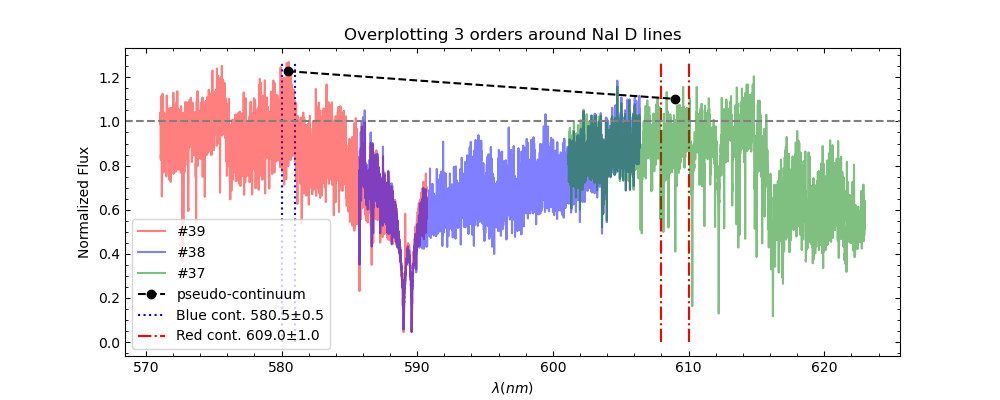

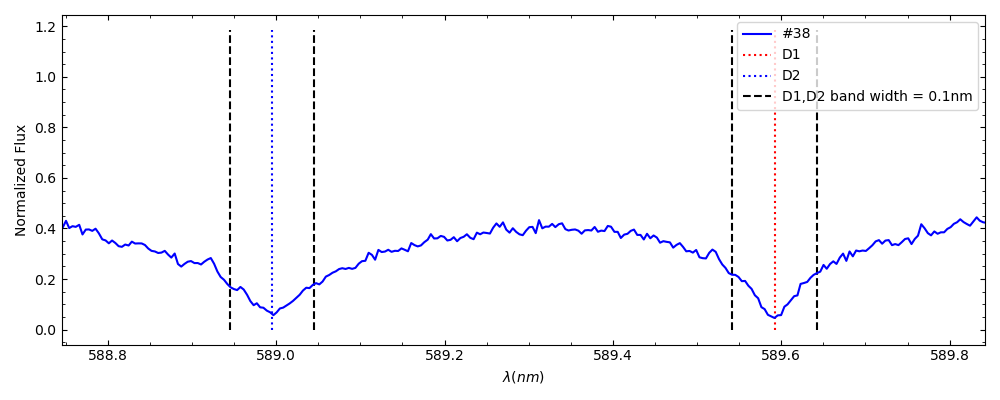

In [14]:
## NARVAL spectra of GJ 436

file_path = 'Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.s'
out_file_path = 'Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.out'

NaI = index_calc.NaI_index_Rodrigo(file_path=[file_path],
                                   out_file_path=[out_file_path])

<a id='CaIIH_cell'></a>

## CaIIH Index following [Morgenthaler et al. 2012](https://ui.adsabs.harvard.edu/abs/2012A%26A...540A.138M/abstract)
The index is defined as $I_{CaIIH} = \frac{F_{CaIIH}}{F_{cont}}$ where $F_{CaIIH}$ is the mean flux within a 0.04nm wide rectangular bandpass centred on the CaIIH line 396.847nm and $F_{cont}$ is the mean flx with a 2nm wide rectangular window centered on 400.107nm. <br>
The error on the index is estimated by differentiating the respective equation and taking into account the flux in each band giving;
$\sigma_{I_{CaIIH}} \approx |I_{CaIIH}|\sqrt{(\frac{\sigma_{F_{CaIIH}}}{F_{CaIIH}})^2 + (\frac{\sigma_{F_{cont}}}{F_{cont}})^2}$


In [15]:
index_calc.CaIIH_Index?

Signature:
index_calc.CaIIH_Index(
    file_path,
    radial_velocity=9609,
    degree=4,
    CaIIH_line=396.847,
    CaIIH_band=0.04,
    cont_R_line=400.107,
    cont_R_band=2.0,
    Instrument='NARVAL',
    Stokes_profile=['V'],
    norm_spec=False,
    plot_fit=False,
    plot_spec=True,
    print_stat=True,
    save_results=False,
    results_file_name=None,
    save_figs=False,
    out_file_path=None,
    ccf_file_path=None,
)
Docstring:
Calculates the CaIIH index following Morgenthaler A., et al., 2012, A&A, 540, A138. 
NOTE: The CaIIH line flux is measured within a rectangular bandpass instead of a triangular one following Boisse I., et al., 2009, A&A, 495, 959.

Parameters:
-----------
file_path: list, .s format (NARVAL), ADP..._.fits format (HARPS) or s1d_A.fits format (HARPS-N)
List containng the paths of the spectrum files 

radial_velocity: int, default: 9609 m/s
Stellar radial velocity along the line-of-sight taken from GAIA DR2 for GJ 436.
This value is used for doppler 

Extracting spectral orders
----------------------------------------------------------------------------------------------------------------
Total 37 spectral orders extracted
----------------------------------------------------------------------------------------------------------------
The #57 order wavelength read from .s file using pandas is: [393.9227 393.9253 393.9279 ... 402.998  403.0001 403.0022]
The #57 order intensity read from .s file using pandas is: [1.5536 2.6436 1.8858 ... 3.6441 2.5094 2.6068]
The #57 order intensity error read from .s file using pandas is: [0.30573 0.30353 0.30541 ... 0.4496  0.44699 0.43788]
----------------------------------------------------------------------------------------------------------------
The doppler shift size using RV 9609 m/s and the CaIIH line of 396.847nm is: 0.0127nm
----------------------------------------------------------------------------------------------------------------
The spectral order used ranges from 393.91nm to 402.98

[[2457542.37484, 0.81562, 0.23728]]

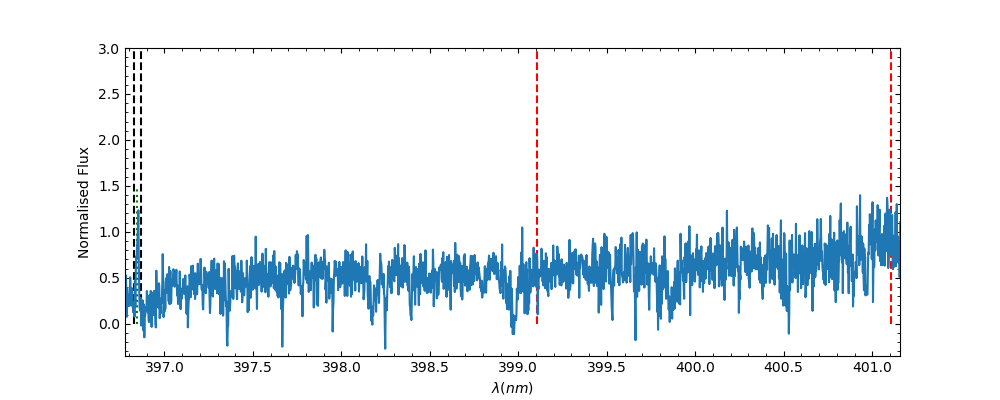

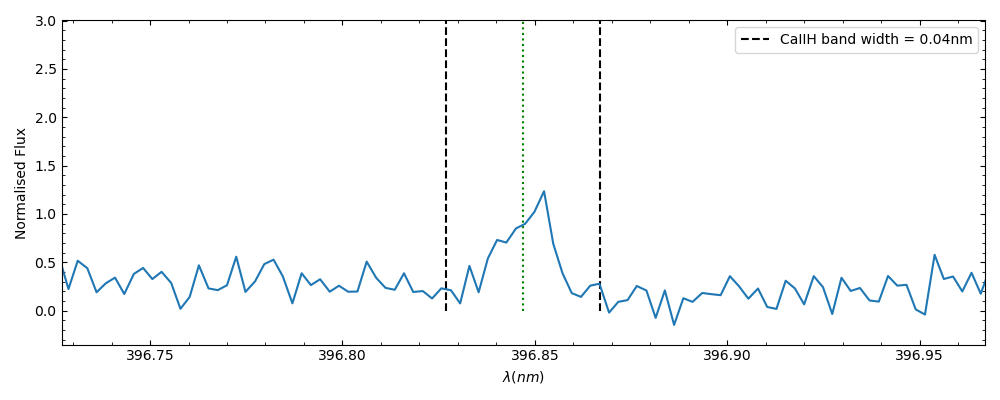

In [16]:
## NARVAL spectra of GJ 436

file_path = 'Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.s'
out_file_path = 'Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.out'

index_calc.CaIIH_Index(file_path=[file_path],
                       out_file_path=[out_file_path])


<a id='HARPS_cell'></a>

## HARPS and HARPS-N Intrument spectra
- All index functions can also be used on spectra obtained from the HARPS and HARPS-N spectrographs using the `Instrument` parameter as shown below!

File contains NaN in flux errors array. Calculating flux error using CCD readout noise: 2.178
-------------------------------------------------------------------------------------------------------------------------------------------------------------
The calculated flux error array contains a few NaN values due to negative flux encountered in the square root.
-------------------------------------------------------------------------------------------------------------------------------------------------------------
The doppler shift size using RV 9609 m/s and the H alpha line of 656.2808nm is: 0.021nm
The spectral region used ranges from 653.066nm to 660.009nm. These values are doppler shift corrected and rounded off to 3 decimal places
-------------------------------------------------------------------------------------------------------------------------------------------------------------
H alpha region used ranges from 656.201nm to 656.36nm:
F1 region used ranges from 654.550000000

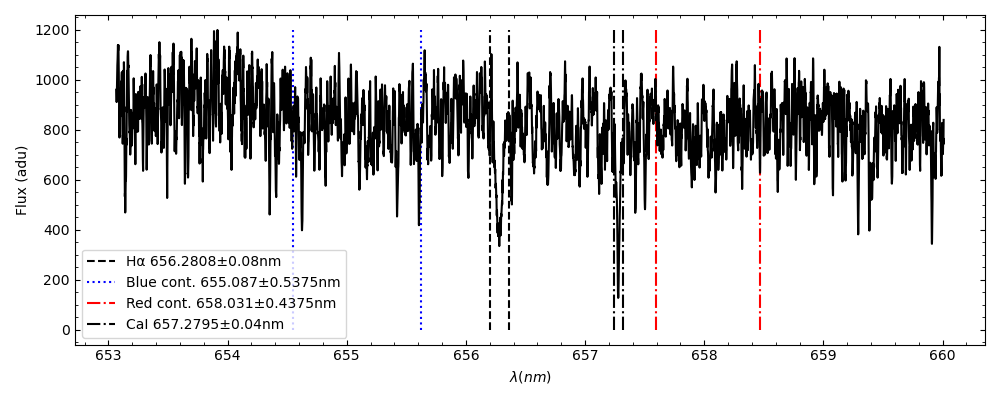

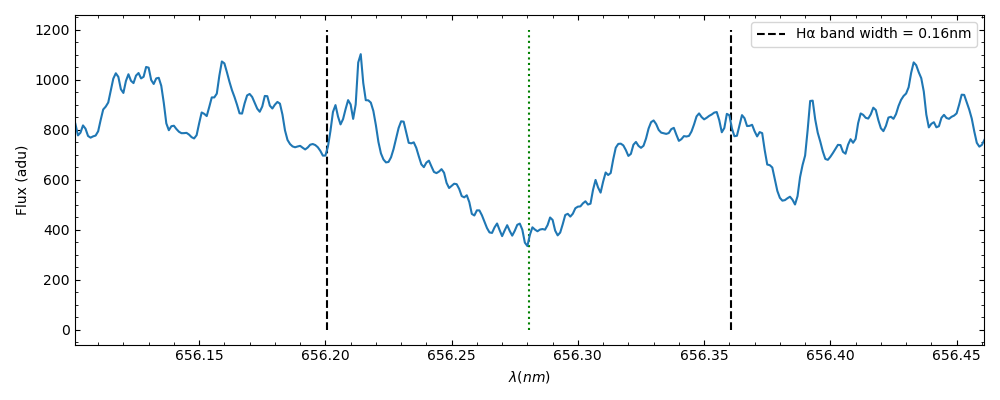

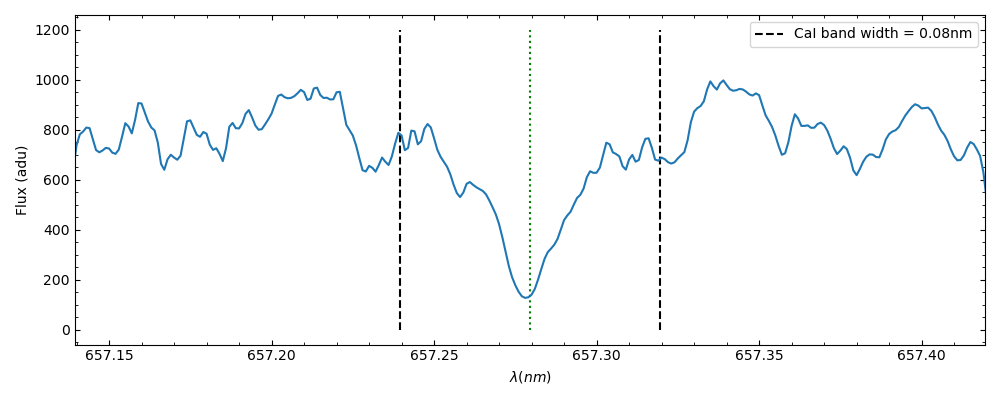

In [6]:
## HARPS spectra of GJ 436

file_path = 'Test_files/HARPS/ADP.2020-03-23T01:02:03.392.fits'

HaI_HARPS = index_calc.H_alpha_index(file_path=[file_path],
                                    Instrument='HARPS')

The doppler shift size using RV 9777.609160551201 m/s and the H alpha line of 656.2808nm is: 0.021nm
-------------------------------------------------------------------------------------------------------------------------------------------------------------
The spectral region used ranges from 653.0660000000001nm to 660.009nm. These values are doppler shift corrected and rounded off to 3 decimal places
-------------------------------------------------------------------------------------------------------------------------------------------------------------
H alpha region used ranges from 656.201nm to 656.36nm:
F1 region used ranges from 654.5500000000001nm to 655.6240000000001nm:
F2 region used ranges from 657.594nm to 658.4680000000001nm:
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean of 160 flux points in H alpha: 92.43617248535156±0.76008
Mean of 1075 flux points in 

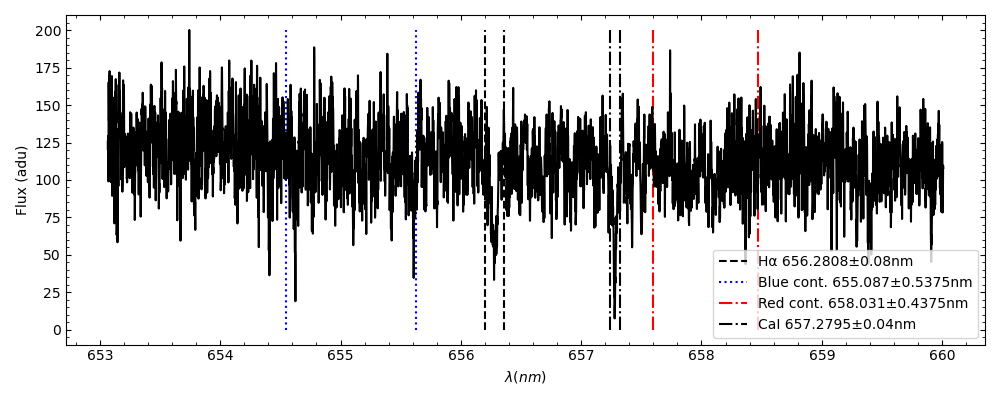

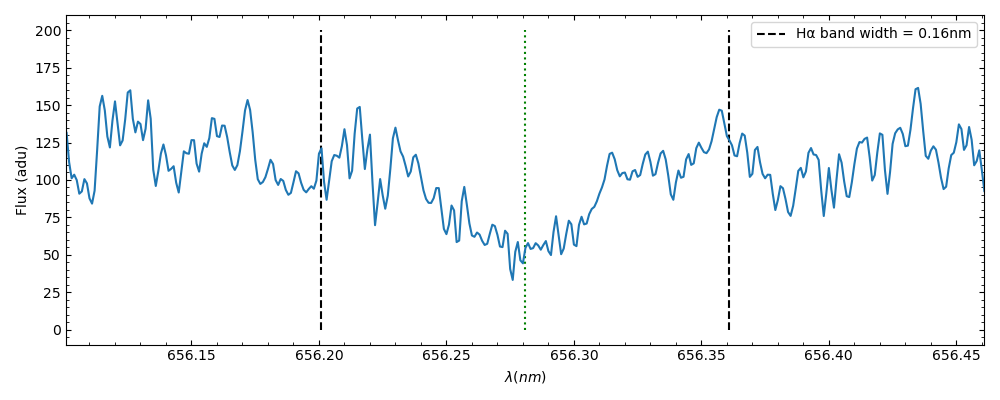

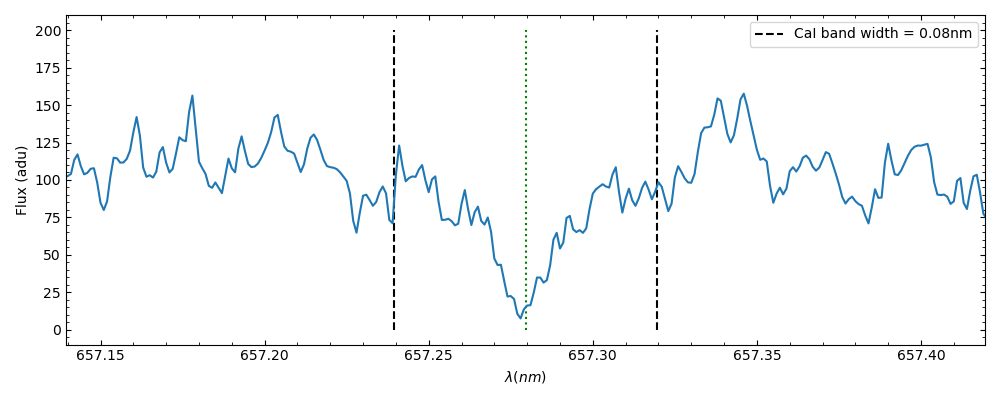

In [7]:
## HARPS-N spectra of GJ 436

s1d_file_path = 'Test_files/HARPS-N/HARPN.2015-02-25T21-22-33.283_s1d_A.fits'
ccf_file_path = 'Test_files/HARPS-N/HARPN.2015-02-25T21-22-33.283_ccf_M2_A.fits'

HaI_HARPS_N = index_calc.H_alpha_index(file_path=[s1d_file_path],
                                       ccf_file_path=[ccf_file_path],
                                       Instrument='HARPS-N')

## NOTE: 
- Notice for this run above, in addition to the file path, I also provided the CCF file path which contains the radial velocity for that particular spectra. If present, the corresponding CCF file path can be passed as a parameter to the function, for both HARPS and HARPS-N instruments, to use the radial velocity from for a better doppler shift precision. If not given, the radial velocity can be passed manually using the `radial_velocity` parameter, which in this case is already set to GJ 436's radial velocity as default.
- Note the `Instrument` parameter was not set for previous run since it's already set to 'NARVAL' by default.

# Secondary functions from the __spec_analysis__ module

<a id='read_data_cell'></a>
## Read Data

- The `read_data` and `check_lines` functions from this python module have already been explained breifly [here](#second_func_cell). But essentially, the `read_data` function reades the spectrum data for a given instrument type. Below is an example on HARPS data.
- The function plots the read spectrum and returns the extracted object parameters as a `dict` and the spectrum as a `list` conatining the wavelength, flux and flux error.

Reading the data from the .fits file: Test_files/HARPS/ADP.2020-03-23T01:02:03.392.fits
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Extracting useful object parameters from the .fits file header
-------------------------------------------------------------------------------------------------------------------------------------------------------------
MJD: 58930.16834088
BJD: 2458930.68053158
BERV: -7.57560520995221
EXPTIME: 1199.9981
OBS_DATE: 2020-03-22T04:02:24.652
PROG_ID: 1102.C-0339(F)
SNR: 14.15
SIGDET: 3.3
CONAD: 0.66
RON: 2.178
RV: nan
-------------------------------------------------------------------------------------------------------------------------------------------------------------


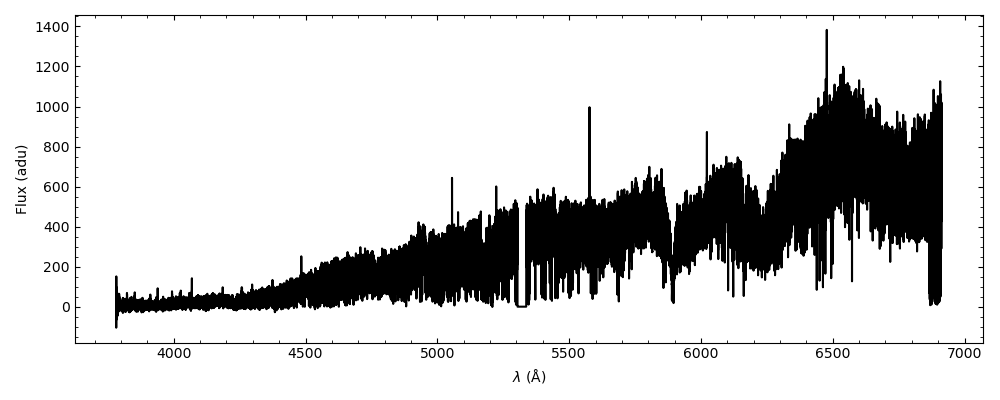

In [2]:
HARPS_data = spec_analysis.read_data(file_path='Test_files/HARPS/ADP.2020-03-23T01:02:03.392.fits',
                                     Instrument='HARPS')

<a id='LS_cell'></a>

## LombScargle Periodogram

In order to investigate periodicity in the variations of activity indices calculated, the `LS_periodogram` function from the __spec_analysis__ module can be used. The function calculates a LombScargle periodogram using the astropy.timeseires module (more info on it [here](https://docs.astropy.org/en/stable/timeseries/lombscargle.html)) <br>
Below is an example run of this function on the 16 H$\alpha$ indices calculated on NARVAL data of GJ 436 in the file 'Test_results.csv'

-------------------------------------------------------------------------------------------------------------------------------------------------------------
Total number of frequencies tested: 831
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Frequency grid resolution: 0.001192
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Calculating False Alarm Probabilities/Levels (FAPs/FALs) using the bootstrap method
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Frequency at max. power is: 0.829 which is 1.2063d
-------------------------------------------------------------------------------------------------------------------------------------------------------------

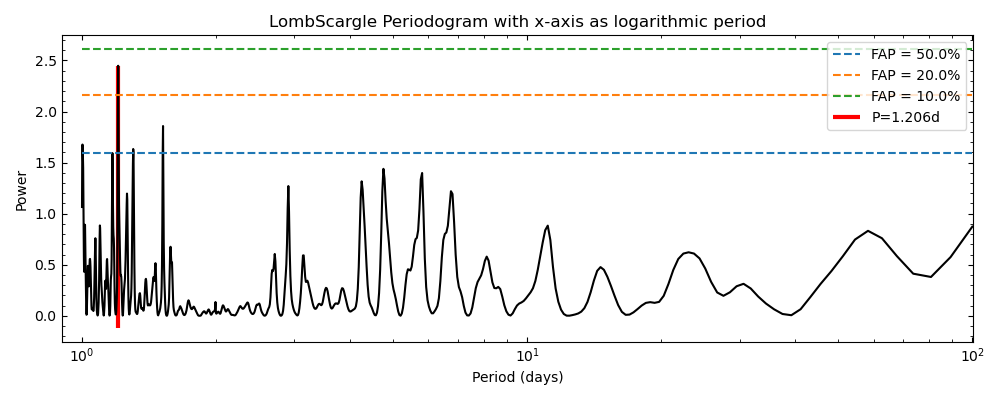

-------------------------------------------------------------------------------------------------------------------------------------------------------------
Sampling window period is: 1.0005d
-------------------------------------------------------------------------------------------------------------------------------------------------------------


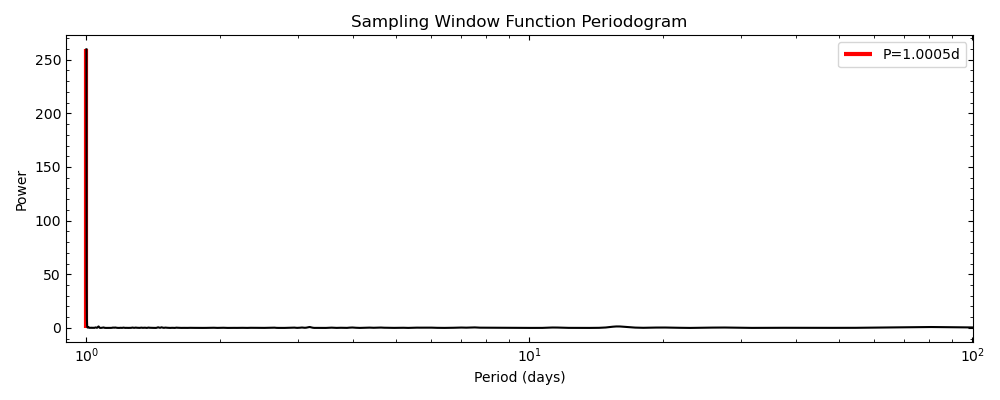

In [5]:
## Read the Test_results file using pandas

data = pd.read_csv('Test_files/Test_results.csv')

LS = spec_analysis.LS_periodogram(x=data['HJD'],
                                  y=data['I_Ha16'],
                                  dy=data['I_Ha16_err'],
                                  minimum_frequency=1/100,
                                  maximum_frequency=1.0)

- The function plots two figures. The top one shows the LombScargle periodogram with the x-axis showing trial periods in the log-scale and marking the false alarm levels (FALs) and the best period using colored lines. The bottom one shows the periodogram of the sampling window function of the given data. In this case, the sampling window period is 1.005d which is common for ground-based observations as most observations are done around the same time each night.
- The `LS_periodogram` function can take multiple arguments to control features from how many Fourier terms to include in the periodogram analysis to what method to use for calculating the false alarm probability (FAP). See function docstring for more info. 

<a id='period_fit_cell'></a>

## Period Phase Fit

- The best period detected from the periodogram above can be used to fit a sine model to the data using the `period_fit` function. Below is an example run of this function on the same data above with the model period specified as __1.206d__ and the fit parameter set to __'phase'__ which phase-folds the data at the given period and plots the best-fit model on top of it.
- The fit parameter can also be set to __'JD'__ which overplots the model sine-wave over the enitre observation timespan instead. See docstring for more info.

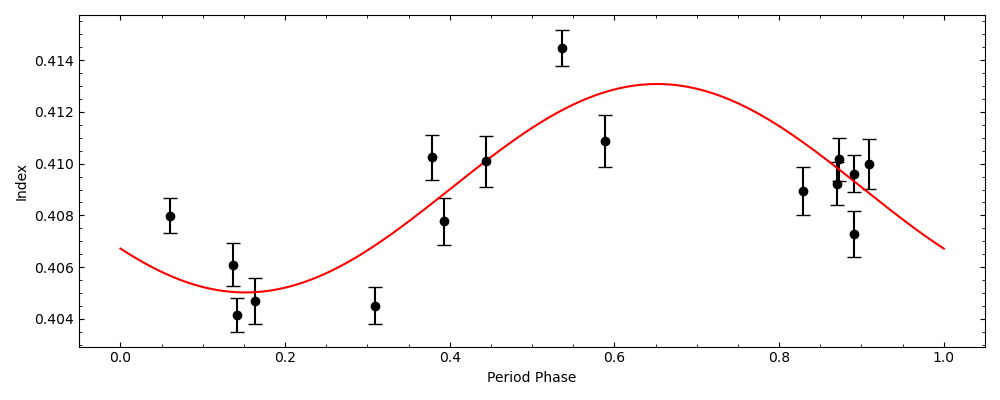

In [5]:
## Read the Test_results file using pandas

data = pd.read_csv('Test_files/Test_results.csv')

p_fit = spec_analysis.period_fit(x=data['HJD'],
                                 y=data['I_Ha16'],
                                 dy=data['I_Ha16_err'],
                                 period=1.206,
                                 fit='phase')

<a id='ephem_cell'></a>

## System Ephemerides

<a id='plotting_cell'></a>

# Plotting functions from the __plotting__ module

## Overplotting multiple spectrums

To compare spectrums of different observations with one another, its often useful to overplot them. The `overplot()` function from the `plotting` module does just that. <br>
Below is an example run on 5 NARVAL files. The function takes two parameters; list of file paths and the Instrument type used. The plot can also be saved using the `save_fig` parameter.

In [8]:
s_files = ['Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.s',
 'Test_files/NARVAL/02may16_norm_gj436_v_01/02may16_norm_gj436_v_01.s',
 'Test_files/NARVAL/03may16_norm_gj436_v_01/03may16_norm_gj436_v_01.s',
 'Test_files/NARVAL/04jun16_norm_gj436_v_01/04jun16_norm_gj436_v_01.s',
 'Test_files/NARVAL/04may16_norm_gj436_v_01/04may16_norm_gj436_v_01.s']

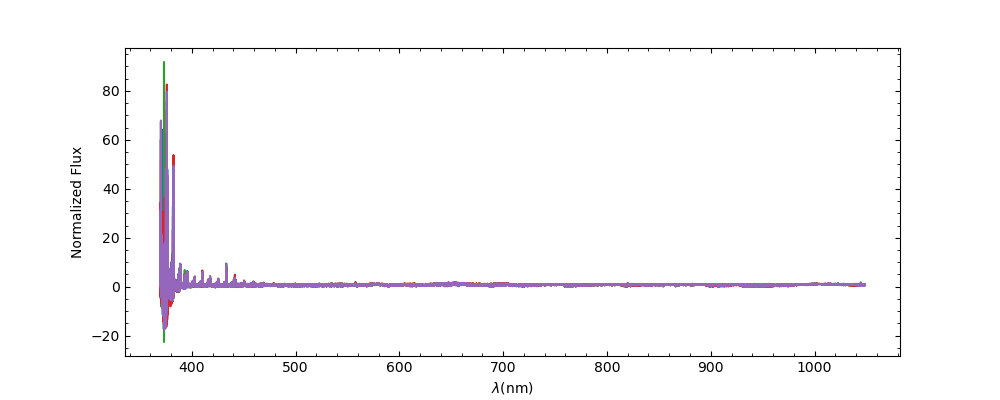

In [9]:
plotting.overplot(s_files, Instrument='NARVAL')

- Note: This function also works for HARPS and HARPS-N instruments!

- 